In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import os
import math
from urllib.request import urlopen
import json
import glob

#Importing Data plotting libraries  
import plotly.express as px       
import plotly.offline as py       
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import matplotlib.ticker as ticker
import matplotlib.animation as animation

#Other Miscallaneous Libraries
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML
import matplotlib.colors as mc
import colorsys
from random import randint
import re

#Machine Learning Libraries
from sklearn.linear_model import LinearRegression

os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle Data Sets/"
%cd /content/gdrive/My Drive/ML Project/

[Errno 2] No such file or directory: '/content/gdrive/My Drive/ML Project/'
/content


In [ ]:
!kaggle datasets download -d fireballbyedimyrnmom/us-counties-covid-19-dataset
!unzip \*.zip  && rm *.zip # downloaded

 73% 7.00M/9.61M [00:00<00:00, 71.4MB/s]
100% 9.61M/9.61M [00:00<00:00, 61.6MB/s]
Archive:  us-counties-covid-19-dataset.zip
  inflating: us-counties.csv         


In [ ]:
# statistical covid data set

!kaggle datasets download -d koryto/countryinfo
!unzip \*.zip  && rm *.zip


  0% 0.00/23.8k [00:00<?, ?B/s]
100% 23.8k/23.8k [00:00<00:00, 42.0MB/s]
Archive:  countryinfo.zip
  inflating: covid19countryinfo.csv  
  inflating: covid19tests.csv        


In [ ]:
!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset
!unzip \*.zip && rm *.zip # same dataset as countryinfo

  0% 0.00/5.63M [00:00<?, ?B/s]
100% 5.63M/5.63M [00:00<00:00, 92.6MB/s]
Archive:  novel-corona-virus-2019-dataset.zip
  inflating: covid_19_data.csv       
  inflating: time_series_covid_19_confirmed.csv  
  inflating: time_series_covid_19_confirmed_US.csv  
  inflating: time_series_covid_19_deaths.csv  
  inflating: time_series_covid_19_deaths_US.csv  
  inflating: time_series_covid_19_recovered.csv  


In [ ]:
!ls

covid19countryinfo.csv		    time_series_covid_19_confirmed_US.csv
covid_19_data.csv		    time_series_covid_19_deaths.csv
covid19tests.csv		    time_series_covid_19_deaths_US.csv
gdrive				    time_series_covid_19_recovered.csv
sample_data			    us-counties.csv
time_series_covid_19_confirmed.csv


In [ ]:
covid = pd.read_csv("covid_19_data.csv")

In [ ]:
covid.shape

(205951, 8)

In [ ]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
covid = covid.rename(columns= {"Province/State": 'province', 'Country/Region': 'country', 'Last Update': 'lastUpdate'})

In [ ]:
# making unique list of countries

country_list = covid['country'].unique()

In [ ]:
# grouping data set by country and their successive dates

country_group_data = covid[0:0]
# print(country_group_data)

for country in country_list:
  temp_data = covid.query("country == @country")
  country_group_data = pd.concat([country_group_data, temp_data])


#Dropping of the column Last Update
country_group_data.drop('lastUpdate', axis=1, inplace=True)

country_group_data['province'].replace(np.nan, "not reported", inplace=True)


In [ ]:
#Creating a dataset to analyze the cases country wise - As of 01/19/2021

latest_data = country_group_data.query("ObservationDate == '12/30/2020'")

country_list_latest = latest_data['country'].unique()

print(f"The total no of countries with covid confirmed cases till 01/19/2021 {len(country_list_latest)}")

The total no of countries with covid confirmed cases till 01/19/2021 193


# Analysis of Spread and deaths due to COVID-19 from Bar Graphs

In [ ]:
unique_dates = covid['ObservationDate'].unique()

# print(unique_dates)

confirmed_cases = []
deaths = []
recovery = []

dateWise_sum = pd.DataFrame({'Date':[], 'Confirmed': [], 'Deaths': [], 'Recovered': []})


for date in unique_dates:
  dateWise = country_group_data.query("ObservationDate == @date")

  temp_confirmed = dateWise['Confirmed'].sum()
  temp_recovered =  dateWise['Recovered'].sum()
  temp_deaths = dateWise['Deaths'].sum()

  to_append = [date, temp_confirmed, temp_recovered, temp_deaths]
  series = pd.Series(to_append, index = ['Date', 'Confirmed','Recovered', 'Deaths'])
  dateWise_sum = dateWise_sum.append(series, ignore_index=True)

country_dataset = {'Date' : unique_dates, 'Confirmed' : dateWise_sum['Confirmed'], 'Recovered' : dateWise_sum['Recovered'], 'Deaths' : dateWise_sum['Deaths']}
country_dataset = pd.DataFrame(country_dataset)


fig = go.Figure()
fig.add_trace(go.Bar(x=country_dataset['Date'], y=country_dataset['Confirmed'], name='Confirmed Cases of COVID-19', marker_color='rgb(55, 83, 109)'))
fig.add_trace(go.Bar(x=country_dataset['Date'],y=country_dataset['Deaths'],name='Total Deaths because of COVID-19',marker_color='rgb(26, 118, 255)'))

fig.update_layout(title='Confirmed Cases and Deaths from COVID-19',xaxis_tickfont_size=14,
                  yaxis=dict(title='Reported Numbers',titlefont_size=16,tickfont_size=14,),
    legend=dict(x=0,y=1.0,bgcolor='rgba(255, 255, 255, 0)',bordercolor='rgba(255, 255, 255, 0)'),barmode='group',bargap=0.15, bargroupgap=0.1)
fig.show()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=country_dataset['Date'], y=country_dataset['Confirmed'], name='Confirmed Cases of COVID-19', marker_color='rgb(55, 83, 109)'))
fig.add_trace(go.Bar(x=country_dataset['Date'],y=country_dataset['Recovered'],name='Total Recoveries because of COVID-19',marker_color='rgb(26, 118, 255)'))

fig.update_layout(title='Confirmed Cases and Recoveries from COVID-19',xaxis_tickfont_size=14,
                  yaxis=dict(title='Reported Numbers',titlefont_size=16,tickfont_size=14,),
    legend=dict(x=0,y=1.0,bgcolor='rgba(255, 255, 255, 0)',bordercolor='rgba(255, 255, 255, 0)'),
    barmode='group',bargap=0.15, bargroupgap=0.1)
fig.show()

# Trends in Pakistan

In [ ]:
# for pakistan

pk_df_covid = covid.query("country == 'Pakistan'")
pk_df_covid.shape


(1673, 8)

In [ ]:
# trend in Pakistan

pk_unique_dates = pk_df_covid['ObservationDate'].unique()

pk_unique_dates.shape

dateWise_sum = pd.DataFrame({'Date':[], 'Confirmed': [], 'Deaths': [], 'Recovered': []})


for date in unique_dates:
  dateWise = pk_df_covid.query("ObservationDate == @date")

  temp_confirmed = dateWise['Confirmed'].sum()
  temp_recovered =  dateWise['Recovered'].sum()
  temp_deaths = dateWise['Deaths'].sum()

  to_append = [date, temp_confirmed, temp_recovered, temp_deaths]
  series = pd.Series(to_append, index = ['Date', 'Confirmed','Recovered', 'Deaths'])
  dateWise_sum = dateWise_sum.append(series, ignore_index=True)

pk_country_dataset = {'Date' : unique_dates, 'Confirmed' : dateWise_sum['Confirmed'], 'Recovered' : dateWise_sum['Recovered'], 'Deaths' : dateWise_sum['Deaths']}
pk_country_dataset = pd.DataFrame(pk_country_dataset)


fig = go.Figure()
fig.add_trace(go.Bar(x=pk_country_dataset['Date'], y=pk_country_dataset['Confirmed'], name='Confirmed Cases of COVID-19 in Pakistan', marker_color='rgb(55, 83, 109)'))
fig.add_trace(go.Bar(x=pk_country_dataset['Date'],y=pk_country_dataset['Deaths'],name='Total Deaths because of COVID-19 in Pakistan',marker_color='rgb(26, 118, 255)'))

fig.update_layout(title='Confirmed Cases and Deaths from COVID-19 in Pakistan',xaxis_tickfont_size=14,
                  yaxis=dict(title='Reported Numbers',titlefont_size=16,tickfont_size=14,),
    legend=dict(x=0,y=1.0,bgcolor='rgba(255, 255, 255, 0)',bordercolor='rgba(255, 255, 255, 0)'),barmode='group',bargap=0.15, bargroupgap=0.1)
fig.show()


In [ ]:
pk_unique_dates = pk_df_covid['ObservationDate'].unique()

pk_unique_dates.shape

dateWise_sum = pd.DataFrame({'Date':[], 'Confirmed': [], 'Deaths': [], 'Recovered': []})


for date in unique_dates:
  dateWise = pk_df_covid.query("ObservationDate == @date")

  temp_confirmed = dateWise['Confirmed'].sum()
  temp_recovered =  dateWise['Recovered'].sum()
  temp_deaths = dateWise['Deaths'].sum()

  to_append = [date, temp_confirmed, temp_recovered, temp_deaths]
  series = pd.Series(to_append, index = ['Date', 'Confirmed','Recovered', 'Deaths'])
  dateWise_sum = dateWise_sum.append(series, ignore_index=True)

pk_country_dataset = {'Date' : unique_dates, 'Confirmed' : dateWise_sum['Confirmed'], 'Recovered' : dateWise_sum['Recovered'], 'Deaths' : dateWise_sum['Deaths']}
pk_country_dataset = pd.DataFrame(pk_country_dataset)


fig = go.Figure()
fig.add_trace(go.Bar(x=pk_country_dataset['Date'], y=pk_country_dataset['Confirmed'], name='Confirmed Cases of COVID-19 in Pakistan', marker_color='rgb(55, 83, 109)'))
fig.add_trace(go.Bar(x=pk_country_dataset['Date'],y=pk_country_dataset['Recovered'],name='Total Recoveries because of COVID-19 in Pakistan',marker_color='rgb(26, 118, 255)'))

fig.update_layout(title='Confirmed Cases and Recoveries from COVID-19 in Pakistan',xaxis_tickfont_size=14,
                  yaxis=dict(title='Reported Numbers',titlefont_size=16,tickfont_size=14,),
    legend=dict(x=0,y=1.0,bgcolor='rgba(255, 255, 255, 0)',bordercolor='rgba(255, 255, 255, 0)'),barmode='group',bargap=0.15, bargroupgap=0.1)
fig.show()

# visualizing the consistency of the variables

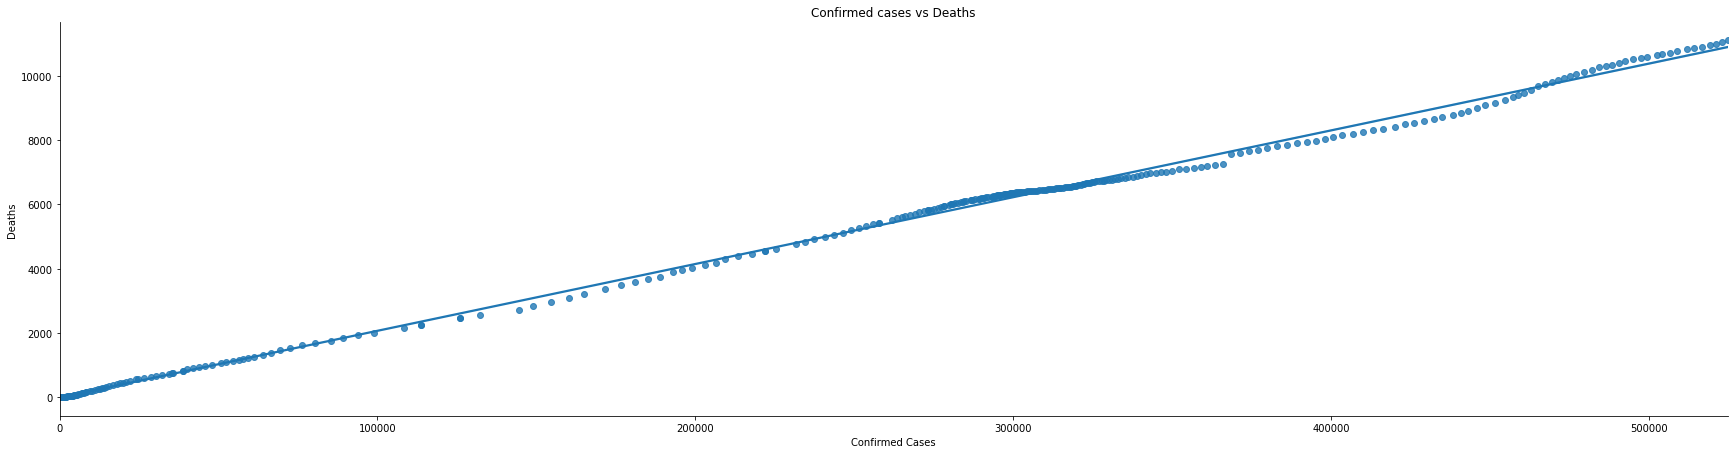

In [ ]:
sns.lmplot(x='Confirmed',y='Deaths',data=pk_country_dataset,aspect=4,height=6)
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.title('Confirmed cases vs Deaths');

In [ ]:
country_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       364 non-null    object 
 1   Confirmed  364 non-null    float64
 2   Recovered  364 non-null    float64
 3   Deaths     364 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.5+ KB


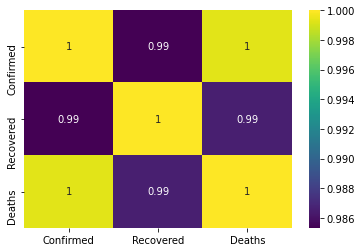

In [ ]:
corr = pk_country_dataset.drop('Date', axis=1).corr()
sns.heatmap(corr, cmap = 'viridis', annot= True);

# Applying Linear Regression on Pakistan DataSet

In [ ]:
from sklearn.model_selection import train_test_split
X = pk_country_dataset.drop(['Date', 'Deaths', 'Recovered'],axis=1) # Independet variable
y = pk_country_dataset['Deaths'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
LinReg=LinearRegression()

In [ ]:
LinReg.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = LinReg.predict(X_test)

Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value')

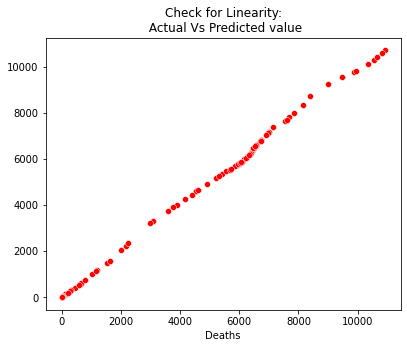

In [ ]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

In [ ]:
print("Predict ", y_pred)
print("Test ", y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = math.ceil(math.sqrt(mse))
print(rmse)

118


In [ ]:
print("Train score:")
print(LinReg.score(X_train, y_train))

print("Test score:")
print(LinReg.score(X_test, y_test))

Train score:
0.9986753576678493
Test score:
0.9987011048870222


# Applying Linear Regression on Pakistan DataSet

In [ ]:
from sklearn.model_selection import train_test_split
X = country_dataset.drop(['Date', 'Deaths', 'Recovered'],axis=1) # Independet variable
y = country_dataset['Deaths'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

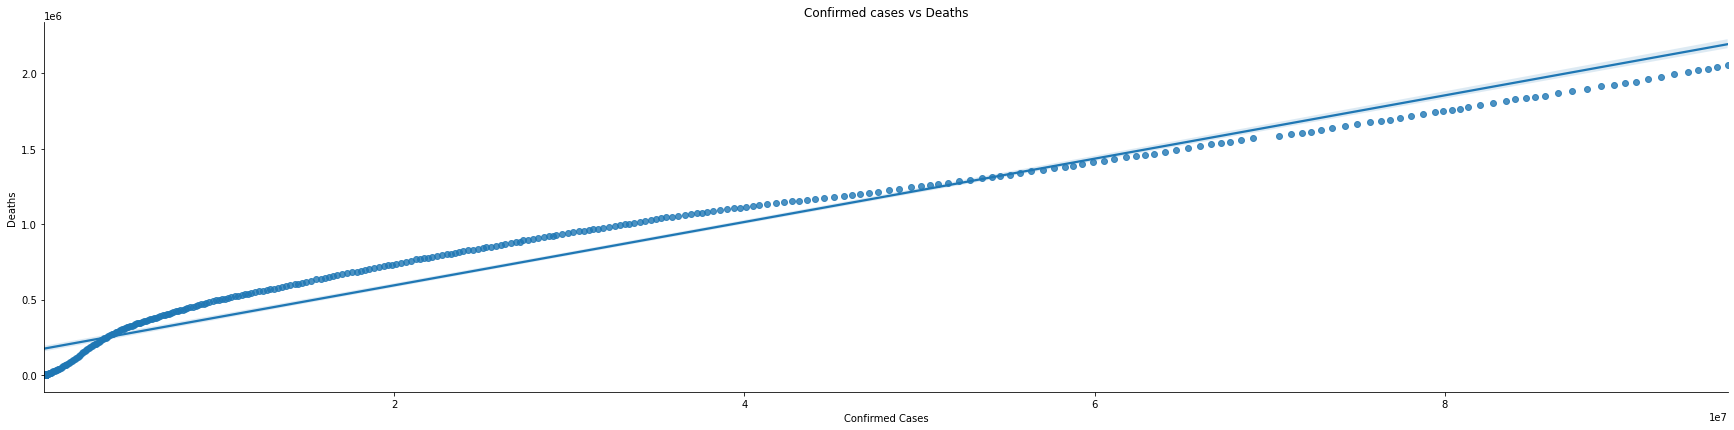

In [ ]:
sns.lmplot(x='Confirmed',y='Deaths',data=country_dataset,aspect=4,height=6)
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.title('Confirmed cases vs Deaths');

In [ ]:
LinReg=LinearRegression()
LinReg.fit(X_train,y_train) 
y_pred = LinReg.predict(X_test)

In [ ]:
# evaluation of model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("Root mean square of global deaths prediction, given cases", math.ceil(rmse))

# value is bigger due to the large number of deaths

Root mean square of global deaths prediction, given cases 118844


In [ ]:
print("Train score:")
print(LinReg.score(X_train, y_train))

print("Test score:")
print(LinReg.score(X_test, y_test))

Train score:
0.9593478950636682
Test score:
0.9578739180940148


# Working on more data sets to find out the health conditions correlation with deaths and confirmed cases


In [ ]:
%cd /content/gdrive/My Drive/ML Project/covcsd

/content/gdrive/My Drive/ML Project/covcsd


In [ ]:
!kaggle datasets download -d aestheteaman01/covcsd-covid19-countries-statistical-dataset

In [ ]:

import glob
filenames = glob.glob("/content/gdrive/My Drive/ML Project/covcsd/*.csv")

dfs = [pd.read_csv(filename) for filename in filenames]

big_frame = pd.concat(dfs, ignore_index=True)



In [ ]:
!ls

# Finding dependency of temperature on deaths

In [ ]:
temp = pd.read_csv('temperature_data.csv')
temp.columns

Index(['Date', 'State', 'Country', 'Cumulative_cases', 'Cumulative_death',
       'Daily_cases', 'Daily_death', 'Latitude', 'Longitude', 'Temperature',
       'Wind_speed', 'Precipitation', 'Fog_Presence'],
      dtype='object')

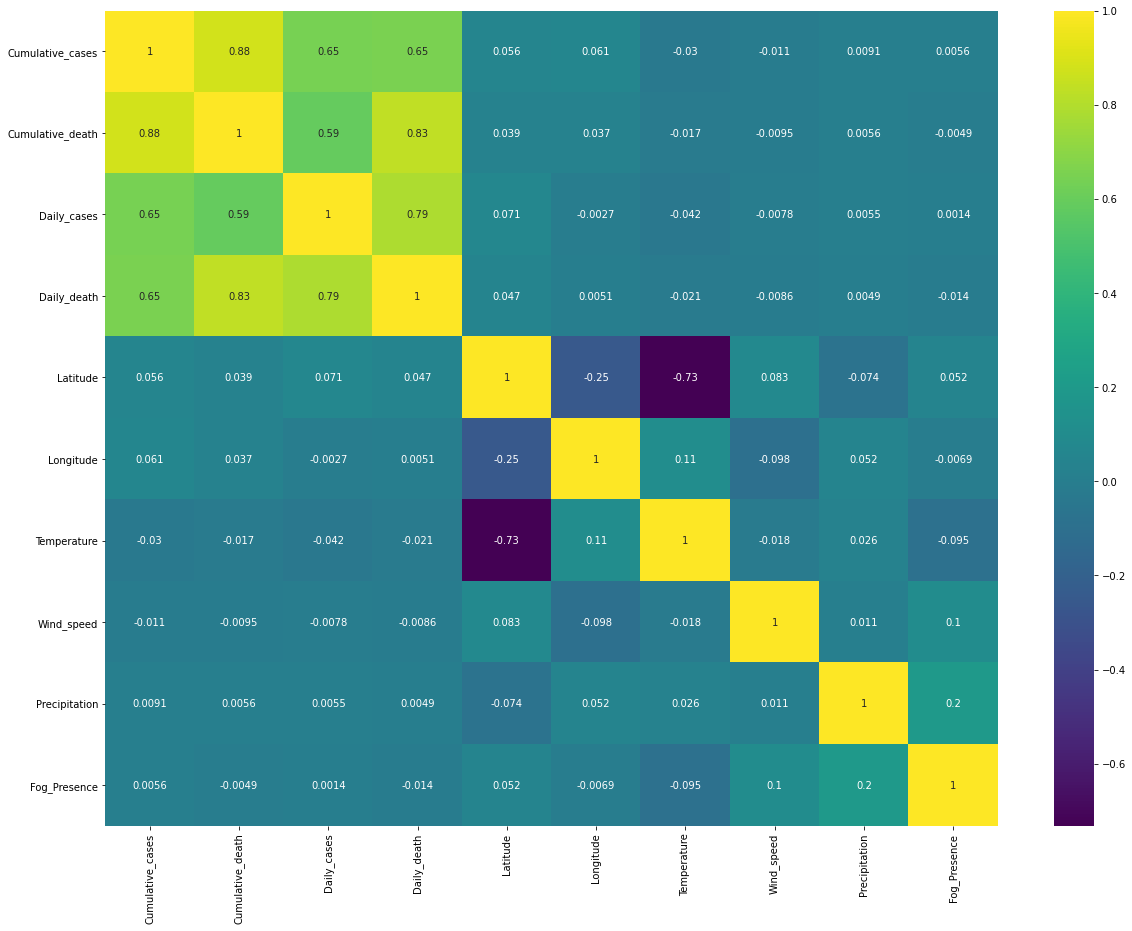

In [ ]:
plt.subplots(figsize=(20,15))
corr = temp.drop('Date', axis=1).corr()
sns.heatmap(corr, cmap = 'viridis', annot= True);

# Finding Health condition dependency on cases and deaths

In [ ]:
us_county = pd.read_csv('us-county.csv')

In [ ]:
us_county.shape
us_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fips                    3142 non-null   int64  
 1   state                   3142 non-null   object 
 2   county                  3142 non-null   object 
 3   Confirmed               3142 non-null   int64  
 4   Deaths                  2664 non-null   float64
 5   Smokers                 3142 non-null   float64
 6   Obesity                 3142 non-null   float64
 7   Food Environment index  3123 non-null   float64
 8   Exercise                3136 non-null   float64
 9   overcrowding            3142 non-null   float64
 10  Diabetics               3142 non-null   float64
 11  Insufficient Sleep      3142 non-null   float64
 12  Traffic Volume          3142 non-null   float64
 13  65% Above Population    3142 non-null   float64
 14  Rural Population        3135 non-null   

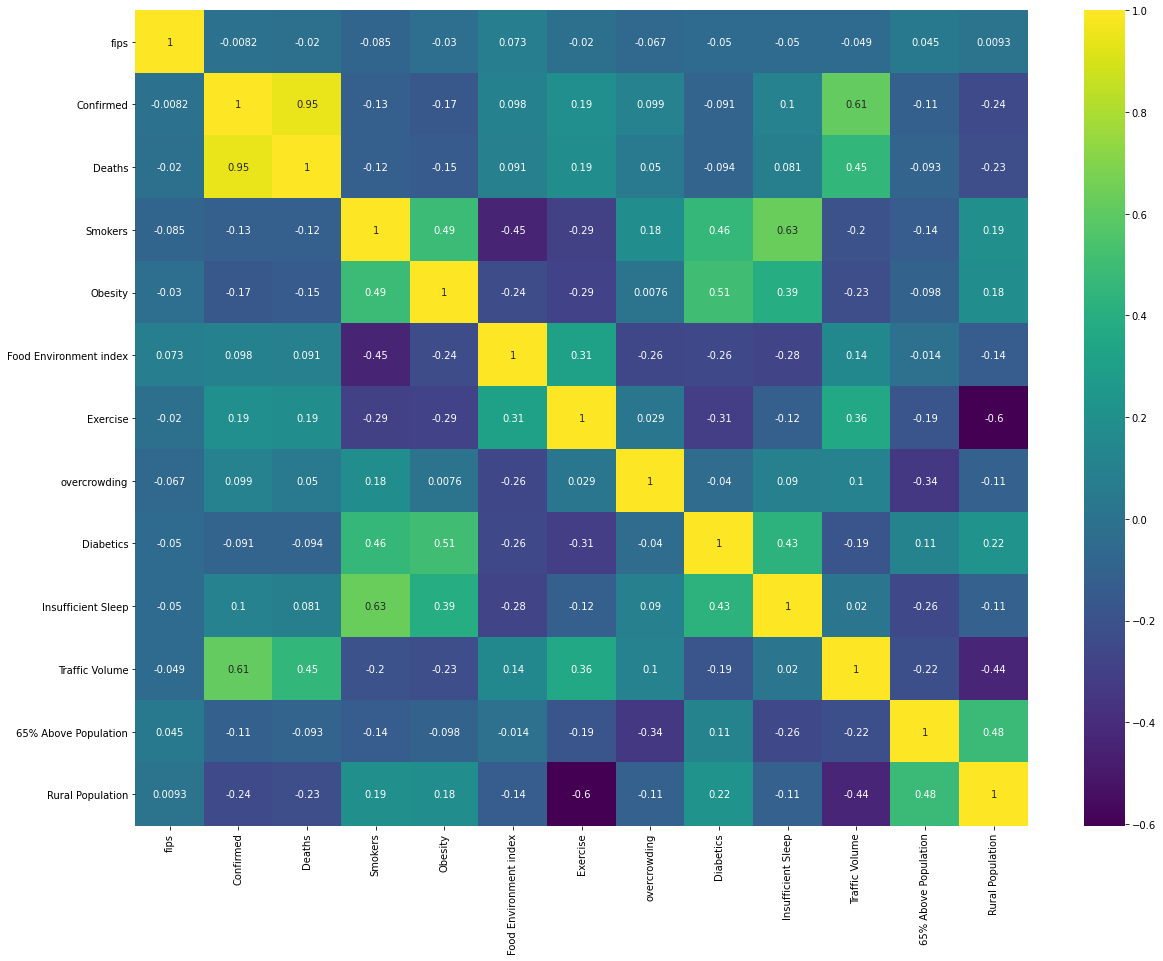

In [ ]:
plt.subplots(figsize=(20,15))
corr = us_county.drop(['state', 'county'], axis=1).corr()
sns.heatmap(corr, cmap = 'viridis', annot= True);

# Traffic Volume VS Deaths

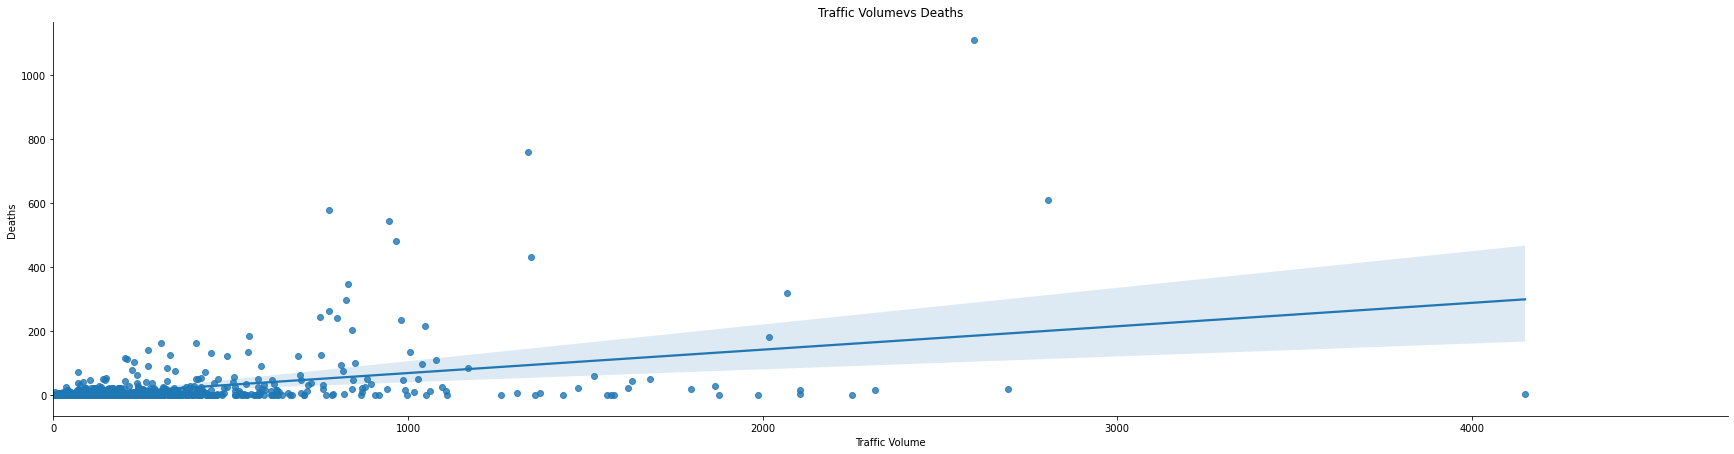

In [ ]:
sns.lmplot(x='Traffic Volume',y='Deaths',data=us_county,aspect=4,height=6)
plt.xlabel('Traffic Volume')
plt.ylabel('Deaths')
plt.title('Traffic Volume VS Deaths');

# Excercise Vs Deaths

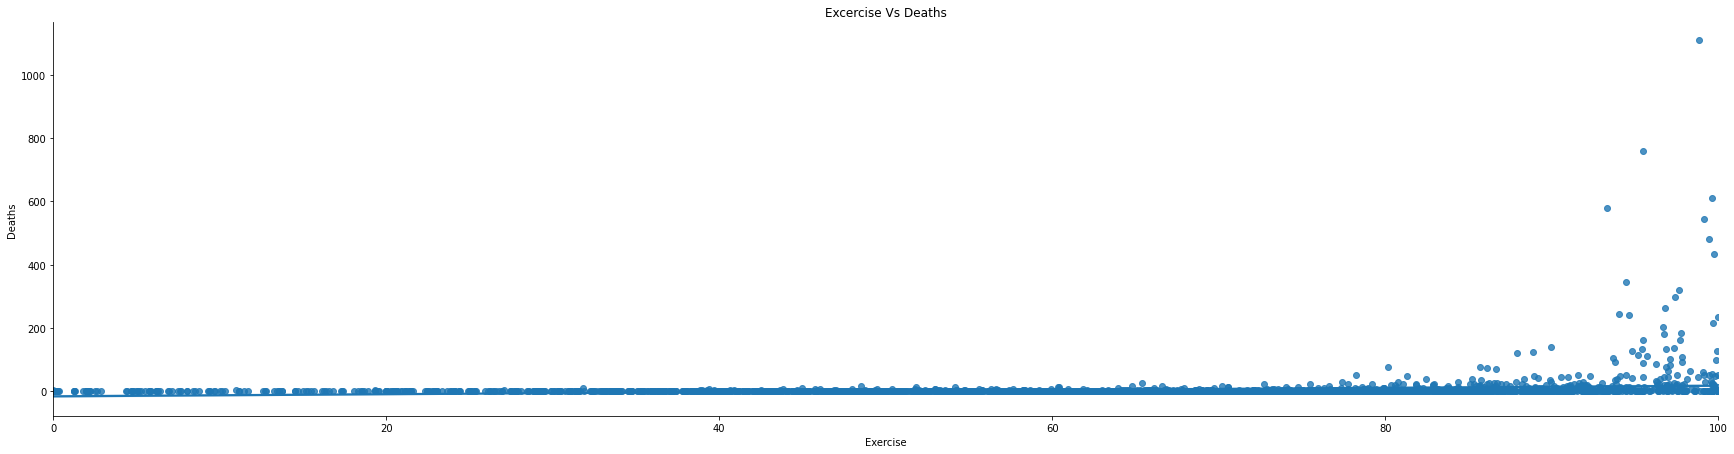

In [ ]:
sns.lmplot(x='Exercise',y='Deaths',data=us_county,aspect=4,height=6)
plt.xlabel('Exercise')
plt.ylabel('Deaths')
plt.title('Excercise Vs Deaths');

In [ ]:
us_county['Deaths'] = us_county['Deaths'].fillna(us_county['Deaths'].mean())

# Linear Regression on county data set Predicting Deaths using traffic Volume

In [ ]:
from sklearn.model_selection import train_test_split
X = np.array(us_county['Traffic Volume']).reshape(-1,1) # Independet variable
y = np.array(us_county['Deaths']).reshape(-1,1) # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=50)

In [ ]:
LinReg=LinearRegression()
LinReg.fit(X_train,y_train) 
y_pred = LinReg.predict(X_test)

In [ ]:
y_test
y_pred

In [ ]:
# evaluation of model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("Root mean square of deaths prediction", math.ceil(rmse))

#less error

Root mean square of deaths prediction 27


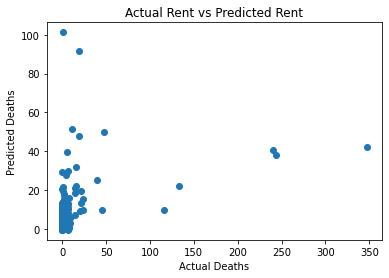

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Deaths")
plt.ylabel("Predicted Deaths")
plt.title("Actual Rent vs Predicted Rent")
plt.show()

In [ ]:
print("Train score:")
print(LinReg.score(X_train, y_train))

print("Test score:")
print(LinReg.score(X_test, y_test))


Train score:
0.14417648735661204
Test score:
0.14915571377354675


# Linear Regression on county data set Predicting Cases using traffic Volume

In [ ]:
X = np.array(us_county['Traffic Volume']).reshape(-1,1) # Independet variable
y = np.array(us_county['Confirmed']).reshape(-1,1) # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=40)

In [ ]:
LinReg=LinearRegression()
LinReg.fit(X_train, y_train) 
y_pred = LinReg.predict(X_test)

In [ ]:
# evaluation of model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("Root mean square of confirmed cases prediction", math.ceil(rmse))


Root mean square of confirmed cases prediction 998


In [ ]:
print("Train score:")
print(LinReg.score(X_train, y_train))

print("Test score:")
print(LinReg.score(X_test, y_test))

Train score:
0.3590950275258856
Test score:
0.4185923215596691
